In [61]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

['deputies_dataset.csv', 'dirty_deputies_v2.csv']


In [62]:
data_v1 = pd.read_csv("../input/deputies_dataset.csv")
data_v2  = pd.read_csv("../input/dirty_deputies_v2.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


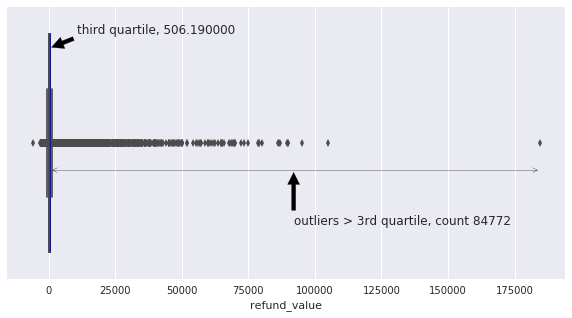

In [63]:
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.boxplot(data_v2['refund_value'])
third_quartile = np.percentile(data_v2['refund_value'],75)
max_quartile = np.percentile(data_v2['refund_value'],100)
split_max_third = (max_quartile - third_quartile) / 2
plt.plot([third_quartile,third_quartile],[-0.4,0.4],c='b')
ax.annotate('third quartile, %f'%(third_quartile), xy=(third_quartile, -0.35), xytext=(third_quartile+10000, -0.4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(s='', xy=(max_quartile,0.1), xytext=(third_quartile,0.1), arrowprops=dict(arrowstyle='<->',facecolor='black'))
ax.annotate('outliers > 3rd quartile, count %d'%(np.where(data_v2['refund_value'] > third_quartile)[0].shape[0]), xy=(split_max_third, 0.1), xytext=(split_max_third, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

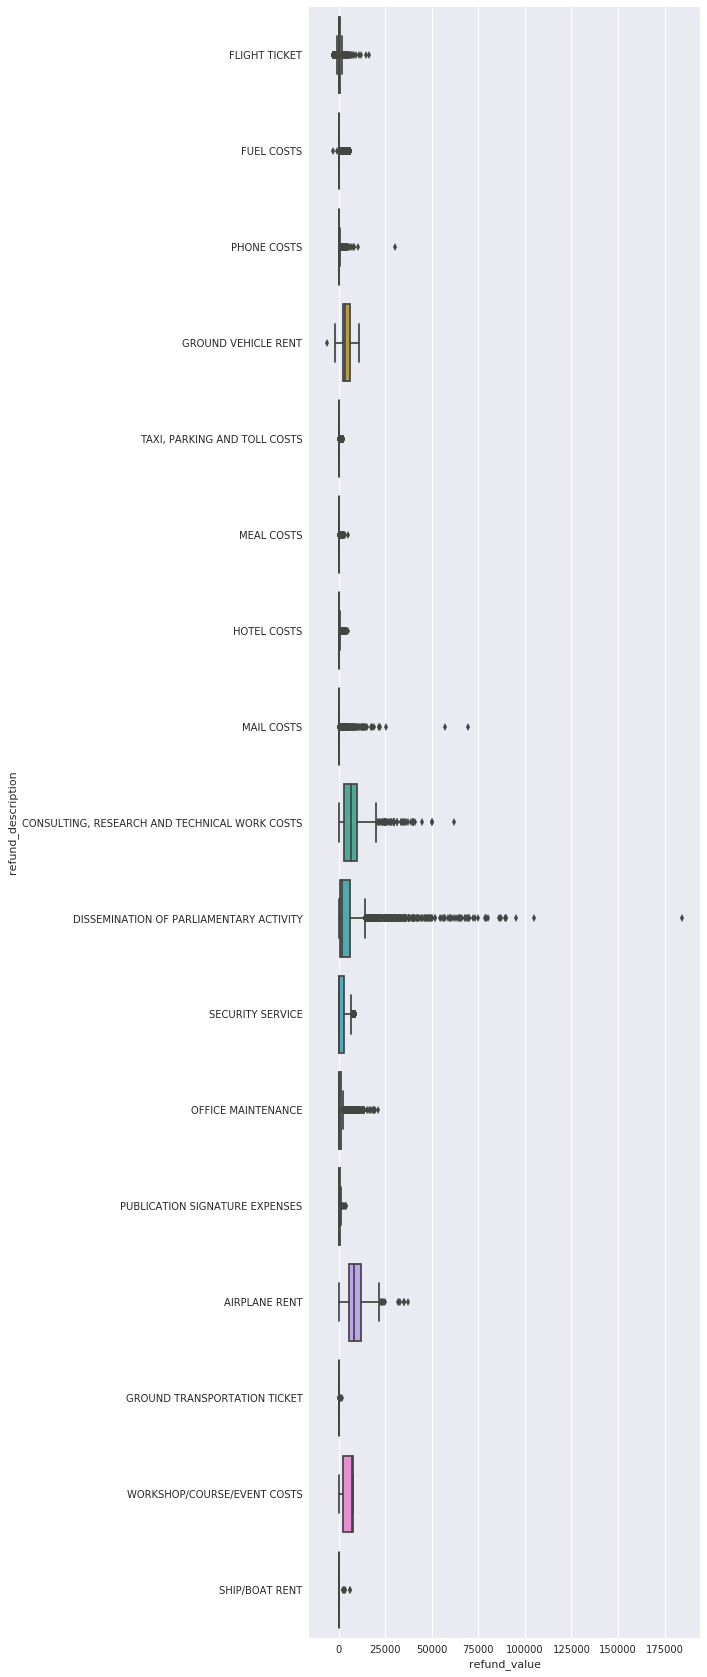

In [64]:
plt.figure(figsize=(7, 30))
sns.boxplot(y=data_v2['refund_description'],x=data_v2['refund_value'])
plt.show()

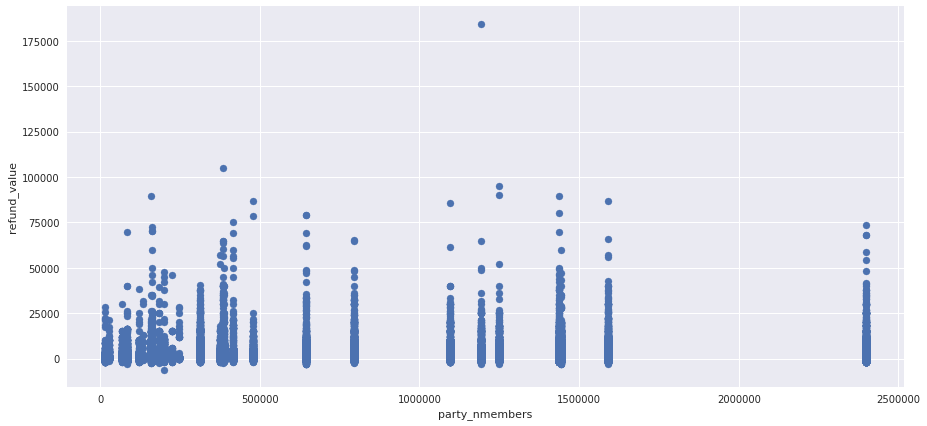

In [65]:
plt.figure(figsize=(15, 7))
plt.scatter(data_v2['party_nmembers'],data_v2['refund_value'])
plt.xlabel('party_nmembers')
plt.ylabel('refund_value')
plt.show()

In [66]:
import scipy
refund_scores = scipy.stats.zscore(data_v2['refund_value'])
data_v2['outliers_refund_score']= [i > 3 or i < -3 for i in refund_scores]

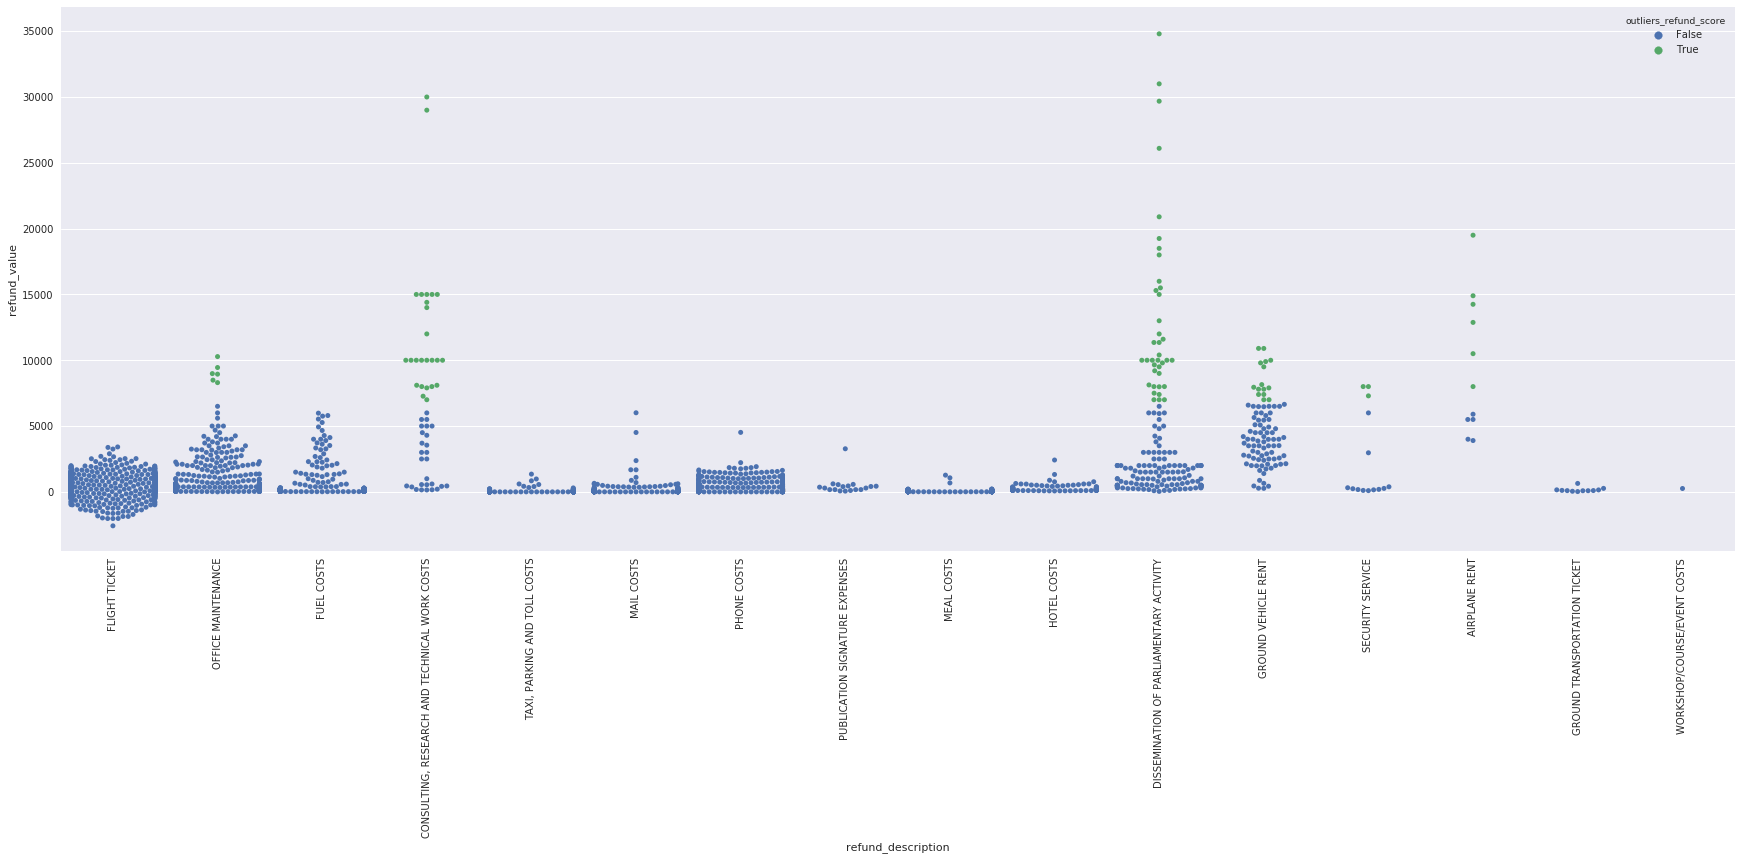

In [67]:
plt.figure(figsize=(30, 10))
sns.swarmplot(x='refund_description',y='refund_value',hue='outliers_refund_score',data=data_v2.sample(n=5000))
plt.xticks(rotation='vertical')
plt.show()

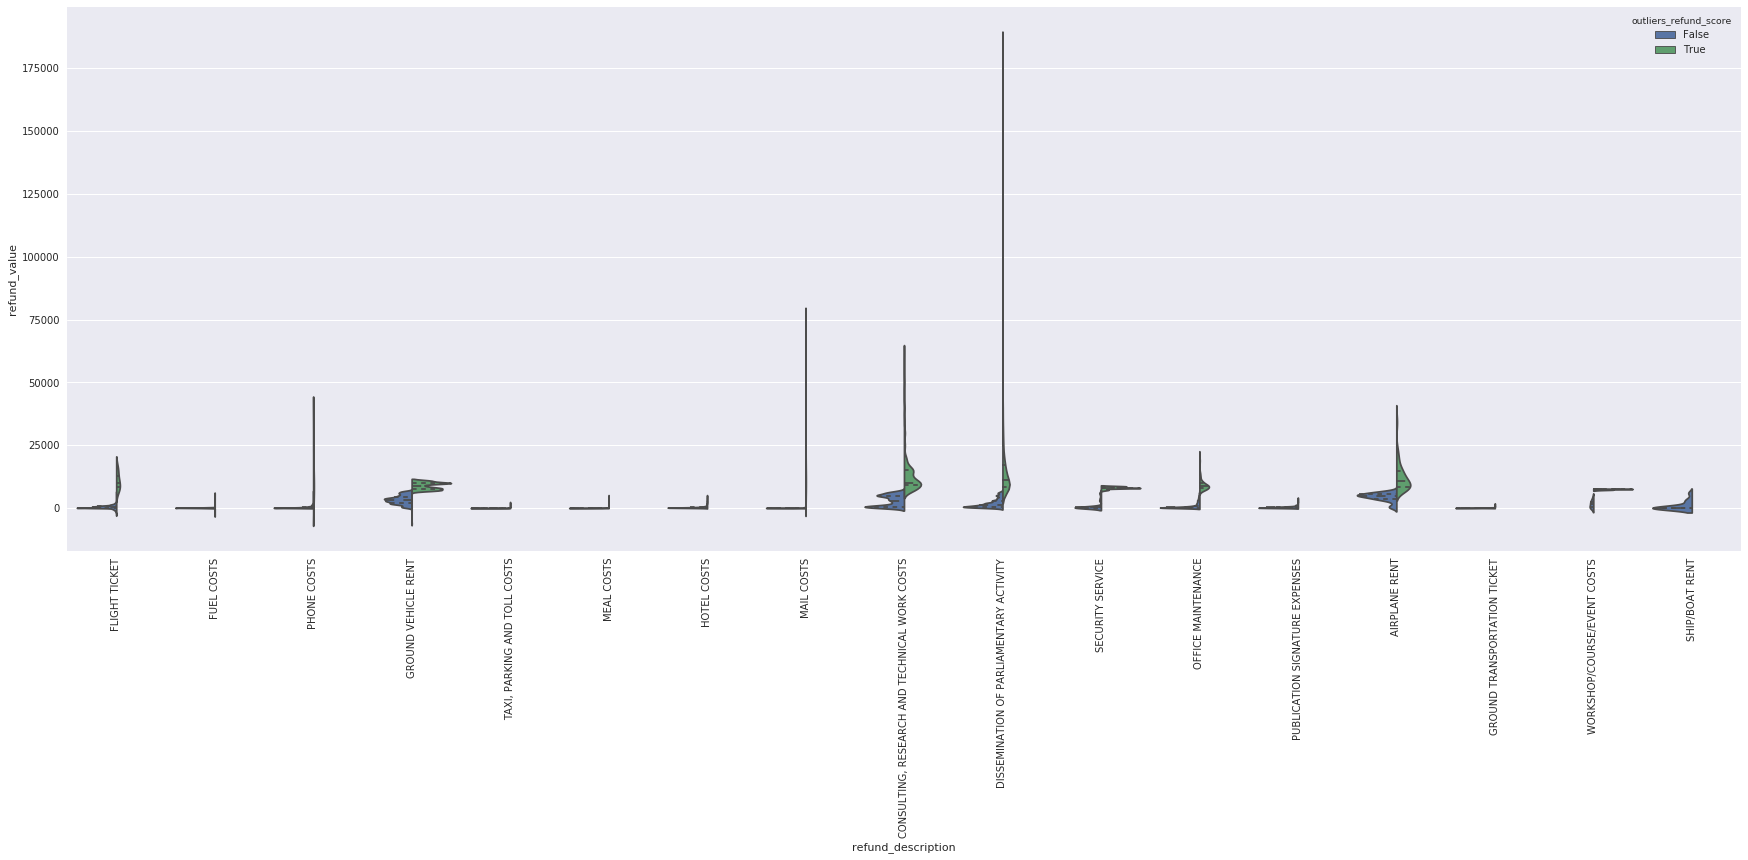

In [68]:
plt.figure(figsize=(30, 10))
sns.violinplot(x='refund_description',y='refund_value',hue='outliers_refund_score',data=data_v2,split=True,inner="quart")
plt.xticks(rotation='vertical')
plt.show()

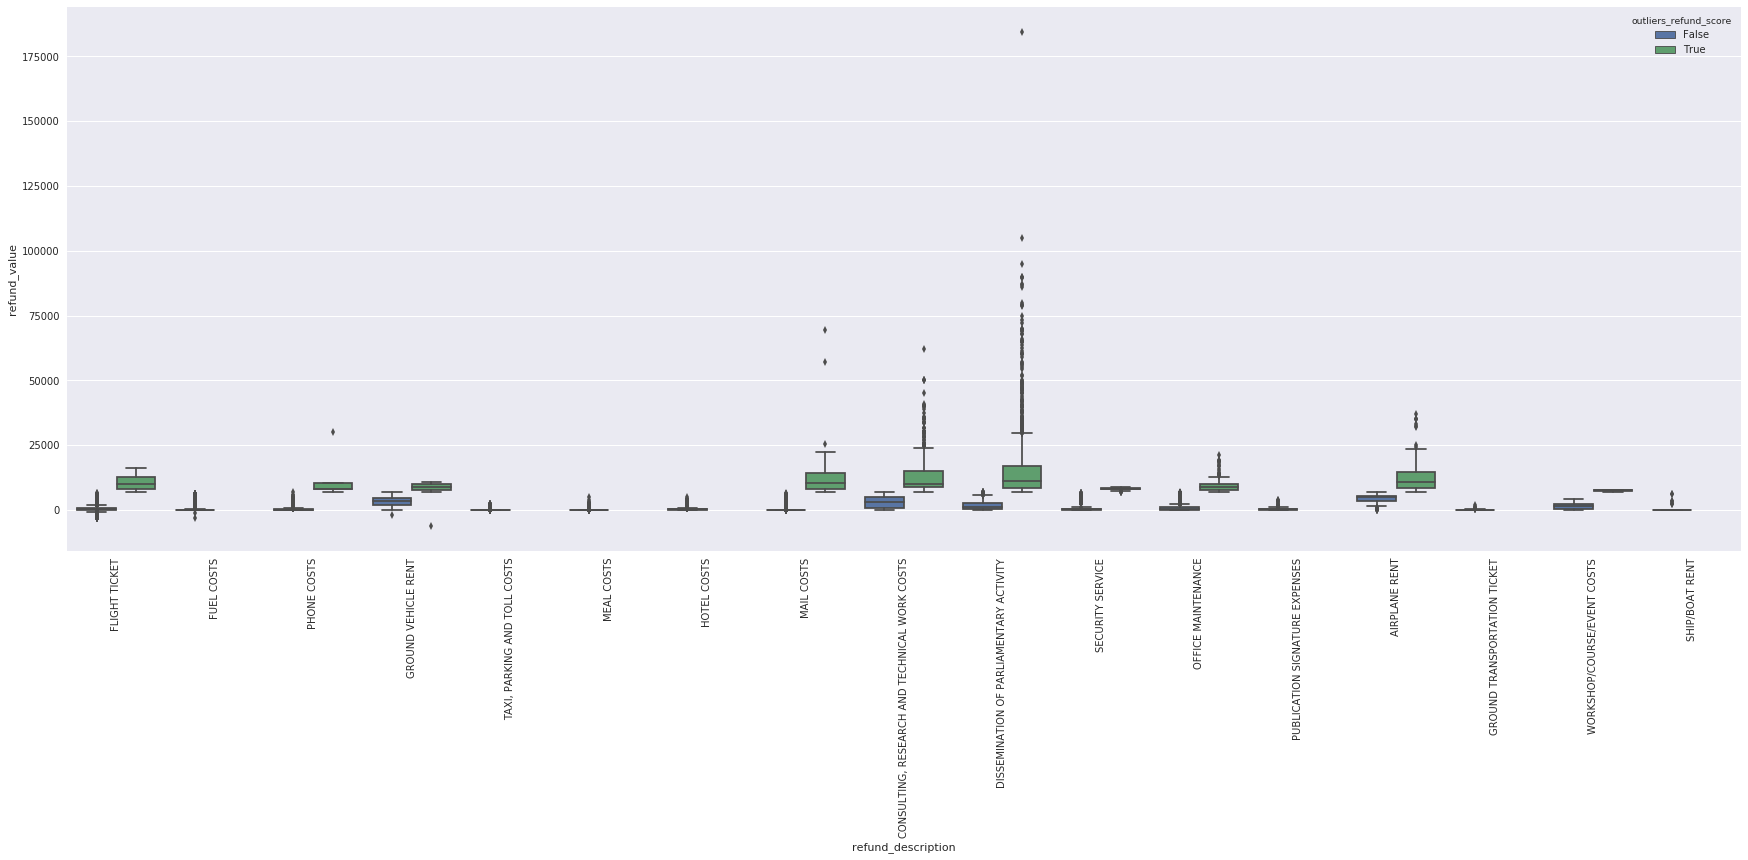

In [69]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='refund_description',y='refund_value',hue='outliers_refund_score',data=data_v2)
plt.xticks(rotation='vertical')
plt.show()